<a href="https://colab.research.google.com/github/WOWEunji/AI_Study/blob/main/QLearning_stocastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## QLearning with Stocastic Environment

예측할수 없는 환경에서의 Q-Learning
모두의 딥러닝 실습 코드
reference : https://hunkim.github.io/ml/RL/rl-l03.pdf

In [1]:
%%bash
pip install gymnasium
pip install numpy matplotlib
pip install gymnasium[toy-text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 14.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 87.3 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

FrozenLake 환경 생성 하기,

is_slippery = False로 설정, render_mode는 human으로 설정한다(나중에 학습 하는 모습을 npc로 귀엽게 확인 할 수 있음)

![alt](https://github.com/WOWEunji/AI_Study/blob/main/frozen_lake_human_mode.png?raw=1)

In [3]:
# env = gym.make("FrozenLake-v1", is_slippery = False, render_mode="human")
#is_slippery가 true이면 stocastic 환경이 됨
env = gym.make("FrozenLake-v1", is_slippery = True)

Q-learning algorithm

$ \hat{Q}(s, a) \leftarrow r + \gamma \max_{a'} \hat{Q}(s',a') $

discount factor
$\gamma$ : .99


In [5]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

dis = .99
num_episodes = 2000
learning_rate = 0.85
rList = []

In [8]:
for i in range(num_episodes):
    state, info = env.reset()
    rAll = 0
    terminated = False
    #add e-greedy
    #시간이 지날수록 탐색을 덜 하도록 조정(e-greedy)
    e = 1.0 / ((i+1)/100)

    while not terminated:
        # env.render()
        # if np.random.rand(1) < e:
        #     action = env.action_space.sample()
        # else:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
        observation, reward,terminated, truncated, info = env.step(action)
        # if terminated and reward == 0.0:
        #     reward = -1.0

        #Update Q with learning_rate
        Q[state, action] = (1-learning_rate)* Q[state, action] + learning_rate*(reward +dis*np.max(Q[observation, :]))
        rAll += reward
        state = observation
        if terminated:
            print(truncated, reward, info)
    rList.append(rAll)
    print(f'num_of_episodes : {i}, {rAll}')

False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 0, 0.0
False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 1, 0.0
False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 2, 0.0
False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 3, 0.0
False 1.0 {'prob': 0.3333333333333333}
num_of_episodes : 4, 1.0
False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 5, 0.0
False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 6, 0.0
False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 7, 0.0
False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 8, 0.0
False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 9, 0.0
False 1.0 {'prob': 0.3333333333333333}
num_of_episodes : 10, 1.0
False 1.0 {'prob': 0.3333333333333333}
num_of_episodes : 11, 1.0
False 1.0 {'prob': 0.3333333333333333}
num_of_episodes : 12, 1.0
False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 13, 0.0
False 0.0 {'prob': 0.3333333333333333}
num_of_episodes : 14, 0.0
False 1.0 {'prob': 0.33333333333333

Success rate : 0.9325
Final Q-Tables Values
[[3.66118071e-03 5.04935951e-03 5.53240555e-01 5.03270056e-03]
 [2.48621348e-03 3.58403134e-03 1.61982836e-03 5.04326497e-01]
 [1.27283180e-03 2.99656070e-03 2.77827869e-03 3.68040077e-01]
 [1.35139066e-03 2.04383142e-03 2.00102905e-03 2.74942400e-01]
 [5.49203439e-01 1.59804848e-03 5.74050188e-04 6.21905748e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.00103438e-05 9.13812407e-06 7.68718113e-02 1.38550121e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.99822336e-04 3.77867658e-04 5.83439651e-04 3.69083459e-01]
 [5.82664833e-04 8.02800020e-01 4.50160881e-04 3.03919681e-03]
 [8.43113744e-01 4.32809043e-04 4.43184235e-05 5.34561040e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.54817375e-02 1.82615963e-02 8.58596056e-01 4.02384916e-02]
 [8.30019356e-02 9.79840922e-01 1.69296612e-01 3.39984457e-02]
 [0.0000000

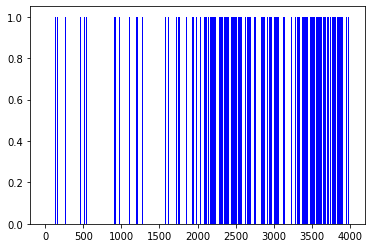

In [9]:
print(f'Success rate : ' + str(sum(rList)/num_episodes))
print("Final Q-Tables Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()